In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv("./data/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [4]:
#Encode categorical variable 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(42))

In [6]:
len(X_train), len(X_test)

(8000, 2000)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
print(X_train[:5,:])

[[-0.57946723 -0.57638802  0.35649971  0.91324755 -0.6557859   0.34567966
  -1.21847056  0.80843615  0.64920267  0.97481699  1.36766974]
 [ 1.72572313 -0.57638802 -0.20389777  0.91324755  0.29493847 -0.3483691
   0.69683765  0.80843615  0.64920267  0.97481699  1.6612541 ]
 [-0.57946723  1.73494238 -0.96147213  0.91324755 -1.41636539 -0.69539349
   0.61862909 -0.91668767  0.64920267 -1.02583358 -0.25280688]
 [-0.57946723 -0.57638802 -0.94071667 -1.09499335 -1.13114808  1.38675281
   0.95321202 -0.91668767  0.64920267 -1.02583358  0.91539272]
 [-0.57946723 -0.57638802 -1.39733684  0.91324755  1.62595257  1.38675281
   1.05744869 -0.91668767 -1.54035103 -1.02583358 -1.05960019]]


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim=1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, nb_epoch = 2)

y_pred = classifier.predict(X_test)

Using TensorFlow backend.


Epoch 1/2
8000/8000 [==============================] - 1s - loss: 0.6035 - acc: 0.7918       

In [14]:
y_pred = y_pred > 0.5

In [15]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
[[1589   18]
 [ 351   42]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.89  0.11]]


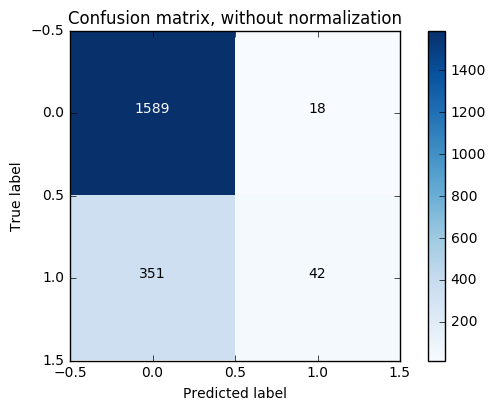

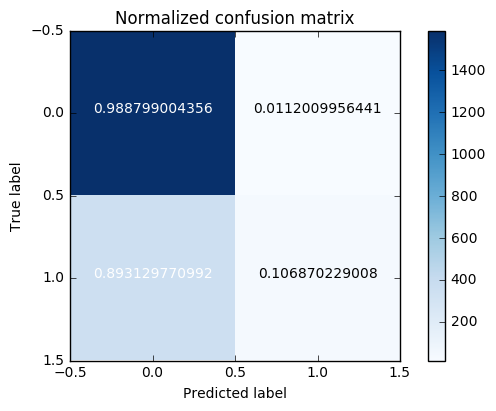

In [21]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [28]:
new_pred = classifier.predict(sc.transform(np.array([[0.0,0,600,1,40,3,60000,2,1,1,50000]])))

In [29]:
new_pred = new_pred > 0.5

In [30]:
print new_pred

[[False]]


In [13]:
#Adding K-Fold validation to improve accuracy
from keras.wrappers.scikit_learn import KerasClassifier

In [14]:
from sklearn.model_selection import cross_val_score

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim=1, init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Epoch 1/10
7200/7200 [==============================] - 2s - loss: 0.5046 - acc: 0.7924       

In [13]:
mean_acc = accuracies.mean()
std_acc = accuracies.std()

In [14]:
print(mean_acc)
print(std_acc)

0.834124994762
0.0178189672181


In [8]:
#Add dropout for regularization to reduce overfit
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu'))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(output_dim=1, init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 2)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Epoch 1/2
7200/7200 [==============================] - 4s - loss: 0.4936 - acc: 0.7933       

In [10]:
#Gridsearch to choose best hyper parameters
#Add dropout for regularization to reduce overfit
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

In [15]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(output_dim=6, init = 'uniform', activation = 'relu'))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(output_dim=1, init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [20]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32], 
              'nb_epoch': [10, 50],
              'optimizer': ['adam', 'rmsprop']}

In [21]:
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [ ]:
#Fit the model using Gridsearch
grid_search.fit(X_train, y_train)

Epoch 1/10
7200/7200 [==============================] - 2s - loss: 0.5600 - acc: 0.7928       

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_